## SUPERVISED MACHINE LEARNING (LINEAR REGRESSION)

In [104]:
#IMPORTING LIBRARIES:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
#importing dataset
Data = pd.read_csv("http://bit.ly/w-data")
print("Data imported")
Data

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [106]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [107]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [108]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [109]:
import seaborn as sns

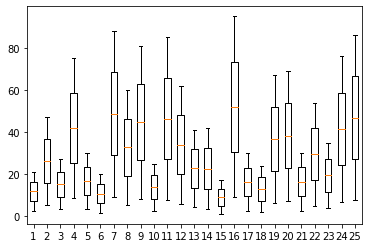

In [110]:
plt.boxplot(Data)
plt.show()

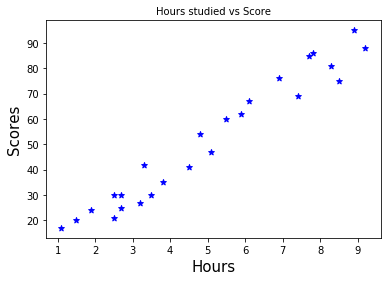

In [111]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(Data.Hours,Data.Scores,color='blue',marker='*')
plt.show()

In [112]:
### the scatter plot indicates the positive relationship like as you learn more hours you will get high scores

In [113]:
X = Data.iloc[:,:-1].values 
Y = Data.iloc[:,1].values

X

In [114]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### PREPARING DATA FOR TRAIN AND TEST

In [115]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state = 0 ,test_size =0.2)

In [116]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### TRAINING MODEL

In [117]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [118]:
linear_reg.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
print("B0 =",linear_reg.intercept_,"\nB1 =",linear_reg.coef_)
## β0 is Intercept & Slope of the line is β1.,"


B0 = 2.018160041434683 
B1 = [9.91065648]


In [120]:
Y0 = linear_reg.intercept_ + linear_reg.coef_*X_train



plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Train set",fontsize=10)
plt.show()

###  TEST DATA 

In [98]:
Y_pred=linear_reg.predict(X_test)
##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [99]:
# print the Y_test.
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

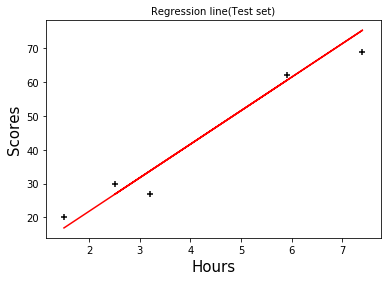

In [100]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line for Test set",fontsize=10)
plt.show()

### Comparing Actual vs Predicted Scores

In [101]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [102]:
#accuracy of model
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105356

### Predicting the Score


In [103]:
Prediction_score = linear_reg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


### Conclusion 

#### ALL IN ALL, FROM THE ABOVE MODEL I CAN SAY THAT IF A STUDENT STUDIES FOR 9.25 THWN STUDENT WILL SECURED 93.69 MARKS